Making a Oscilarity function

'\n# Reading in the file\nimport numpy as np\nimport scipy as sp\nimport matplotlib.pyplot as plt\n\nx = np.linspace(1,41,82)\ny = np.loadtxt("ASTR19_S22_group_project_data.txt",skiprows=3, usecols=(0,2))\n\n\n\ndef model(x, a, b, c):\n    return np.sin(a * x) + np.cos(b * x) + c\n    #     return a * np.sin(b * x)\n\n    \n    \nplt.errorbar(x, y[0])\n\na, a2 = sp.optimize.curve_fit(model, x, y)\n\n\nplt.plot(x, model(x, a[0], a[1], a[2]))\n'

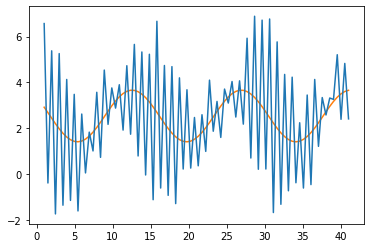

In [62]:
# Reading in the file
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fit = []
#Elton - parsed text file to use for data 
# x_data = np.loadtxt("ASTR19_S22_group_project_data.txt",skiprows=3, usecols=(0))
x_data = np.linspace(1,41,82)
y_data = np.loadtxt("ASTR19_S22_group_project_data.txt",skiprows=3, usecols=(2))

# print(len(y_data))

plt.errorbar(x_data, y_data)
#Elton - doing function and fitting of sin waves 
#looked at https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy for more help on this 
#a = amp, b = frequency, c is phase, offset is d
#how to calculate the phase of a sin wave?? 
#therefore, a = 0.25 (rms), b = 1, c = ??, d = mean of data 
#simple formula for sin where there are 4 parts of the sin function
#def model(x, a, b,c):
def model(x, a, b, c, d):
    return a * np.sin((b * x) + c) + d
    #return np.sin(a * x) + np.cos(b * x) + c

d_mean = np.mean(y_data) 

# Angel - Changed initial values for the amp, freq, phase, and offset of model
p_zero = [2, 0.1*np.std(y_data), 5, d_mean]
#p_zero = [1, 2.7, d_mean] <-lot more spiky with the different formula but the wave isn't tall enough
popt = curve_fit(model, x_data, y_data, p0 = p_zero)
#the * removes the brackets of this array 
# fit = model(x_data, *p_zero)
# Angel - graphed using the optimized parameters returned by curve_fit
fitted = model(x_data, *popt[0])
# plt.plot(x_data, fit)
plt.plot(x_data, fitted)
plt.savefig("fit.png", bbox_inches = "tight")

'''
# Reading in the file
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

x = np.linspace(1,41,82)
y = np.loadtxt("ASTR19_S22_group_project_data.txt",skiprows=3, usecols=(0,2))



def model(x, a, b, c):
    return np.sin(a * x) + np.cos(b * x) + c
    #     return a * np.sin(b * x)

    
    
plt.errorbar(x, y[0])

a, a2 = sp.optimize.curve_fit(model, x, y)


plt.plot(x, model(x, a[0], a[1], a[2]))
'''
